<a href="https://colab.research.google.com/github/dianehkim/StockMarketForecasting/blob/main/FinalFLAML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install flaml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.2/224.2 KB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 13.5 MB/s eta 0:00:00
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 2.2.3
    Uninstalling lightgbm-2.2.3:
      Successfully uninstalled lightgbm-2.2.3


In [ ]:
pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn.model_selection import train_test_split
from flaml import AutoML
from sklearn.metrics import confusion_matrix


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving AMZN.csv to AMZN.csv


In [ ]:
data = pd.read_csv('AMZN.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6438 entries, 0 to 6437
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            6438 non-null   object 
 1   Low             6438 non-null   float64
 2   Open            6438 non-null   float64
 3   Volume          6438 non-null   int64  
 4   High            6438 non-null   float64
 5   Close           6438 non-null   float64
 6   Adjusted Close  6438 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 352.2+ KB


In [ ]:
print(data.columns)

Index(['Date', 'Low', 'Open', 'Volume', 'High', 'Close', 'Adjusted Close'], dtype='object')


In [ ]:
data.describe()

,Low,Open,Volume,High,Close,Adjusted Close
count,6438.000000,6438.000000,6.438000e+03,6438.000000,6438.000000,6438.000000
mean,30.439699,30.844692,1.434213e+08,31.211171,30.830233,30.830233
std,47.246846,47.870620,1.407551e+08,48.425572,47.831241,47.831241
min,0.065625,0.070313,9.744000e+06,0.072396,0.069792,0.069792
25%,1.947031,1.982125,6.943400e+07,2.019000,1.990625,1.990625
50%,6.167000,6.271750,1.065910e+08,6.368500,6.282750,6.282750
75%,36.777249,37.237500,1.617355e+08,37.403125,37.104250,37.104250
max,184.839493,187.199997,2.086584e+09,188.654007,186.570496,186.570496


In [ ]:
data.columns.isna()

array([False, False, False, False, False, False, False])

In [ ]:
data.shape

(6438, 7)

<AxesSubplot:xlabel='Adjusted Close', ylabel='Count'>

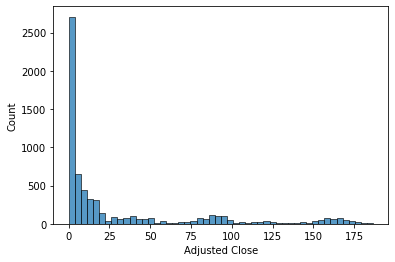

In [ ]:
sns.histplot(data["Adjusted Close"])

In [ ]:
data.head()

,Date,Low,Open,Volume,High,Close,Adjusted Close
0,15-05-1997,0.096354,0.121875,1443120000,0.125000,0.097917,0.097917
1,16-05-1997,0.085417,0.098438,294000000,0.098958,0.086458,0.086458
2,19-05-1997,0.081250,0.088021,122136000,0.088542,0.085417,0.085417
3,20-05-1997,0.081771,0.086458,109344000,0.087500,0.081771,0.081771
4,21-05-1997,0.068750,0.081771,377064000,0.082292,0.071354,0.071354


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
df =  data.drop(columns= ["Date"])

In [ ]:
df.head()

,Low,Open,Volume,High,Close,Adjusted Close
0,0.096354,0.121875,1443120000,0.125000,0.097917,0.097917
1,0.085417,0.098438,294000000,0.098958,0.086458,0.086458
2,0.081250,0.088021,122136000,0.088542,0.085417,0.085417
3,0.081771,0.086458,109344000,0.087500,0.081771,0.081771
4,0.068750,0.081771,377064000,0.082292,0.071354,0.071354


In [ ]:
x = df.iloc[:, 0:4].values
y = df.iloc[:, 5].values

print('Shape of x set:')
print(x.shape)

print('Shape of y set:')
print(y.shape)

Shape of x set:
(6438, 4)
Shape of y set:
(6438,)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,  random_state=0)


In [ ]:
len(y_train)

5150

In [ ]:
len(y_test)

1288

In [ ]:
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

In [ ]:
print(y_train)

[ 15.69449997 120.40950012   6.70149994 ...   2.46000004   4.67150021
   3.53999996]


In [ ]:
automl = AutoML()

In [ ]:
settings = {
    "time_budget": 7200,  # total running time in seconds
    "metric": 'accuracy', 
                        # check the documentation for options of metrics (https://microsoft.github.io/FLAML/docs/Use-Cases/Task-Oriented-AutoML#optimization-metric)
    "task": 'classification',  # task type
    "log_file_name": 'AMZN_file.log',  # flaml log file
    "seed": 1234,    # random seed
}

In [ ]:
'''The main flaml automl API'''
automl.fit(X_train=x_train, y_train=y_train, label = "target", **settings)

[flaml.automl.automl: 03-11 00:48:00] {2726} INFO - task = classification
[flaml.automl.automl: 03-11 00:48:00] {2728} INFO - Data split method: stratified
[flaml.automl.automl: 03-11 00:48:00] {2731} INFO - Evaluation method: cv
[flaml.automl.automl: 03-11 00:48:00] {1316} INFO - class 0 augmented from 1 to 20
[flaml.automl.automl: 03-11 00:48:00] {1316} INFO - class 1 augmented from 1 to 20
[flaml.automl.automl: 03-11 00:48:00] {1316} INFO - class 2 augmented from 1 to 20
[flaml.automl.automl: 03-11 00:48:00] {1316} INFO - class 3 augmented from 2 to 20
[flaml.automl.automl: 03-11 00:48:00] {1316} INFO - class 4 augmented from 2 to 20
[flaml.automl.automl: 03-11 00:48:00] {1316} INFO - class 5 augmented from 5 to 20
[flaml.automl.automl: 03-11 00:48:00] {1316} INFO - class 6 augmented from 1 to 20
[flaml.automl.automl: 03-11 00:48:00] {1316} INFO - class 7 augmented from 1 to 20
[flaml.automl.automl: 03-11 00:48:00] {1316} INFO - class 8 augmented from 2 to 20
[flaml.automl.automl: 0

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 03-11 01:50:33] {3519} INFO -  at 3753.2s,	estimator xgboost's best error=0.7956,	best estimator lgbm's best error=0.0360
[flaml.automl.automl: 03-11 01:50:33] {3334} INFO - iteration 3, current learner extra_tree
[flaml.automl.automl: 03-11 01:50:48] {3519} INFO -  at 3768.2s,	estimator extra_tree's best error=0.9971,	best estimator lgbm's best error=0.0360
[flaml.automl.automl: 03-11 01:50:48] {3334} INFO - iteration 4, current learner extra_tree
[flaml.automl.automl: 03-11 01:51:14] {3519} INFO -  at 3794.5s,	estimator extra_tree's best error=0.9483,	best estimator lgbm's best error=0.0360
[flaml.automl.automl: 03-11 01:51:14] {3334} INFO - iteration 5, current learner lgbm
[flaml.automl.automl: 03-11 02:07:45] {3519} INFO -  at 4785.1s,	estimator lgbm's best error=0.0360,	best estimator lgbm's best error=0.0360
[flaml.automl.automl: 03-11 02:07:45] {3334} INFO - iteration 6, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 03-11 02:45:15] {3519} INFO -  at 7035.2s,	estimator xgboost's best error=0.7956,	best estimator lgbm's best error=0.0360
[flaml.automl.automl: 03-11 02:45:15] {3334} INFO - iteration 7, current learner extra_tree
[flaml.automl.automl: 03-11 02:45:41] {3519} INFO -  at 7060.8s,	estimator extra_tree's best error=0.9483,	best estimator lgbm's best error=0.0360
[flaml.automl.automl: 03-11 02:45:41] {3334} INFO - iteration 8, current learner rf
[flaml.automl.automl: 03-11 02:46:10] {3519} INFO -  at 7090.7s,	estimator rf's best error=0.9970,	best estimator lgbm's best error=0.0360
[flaml.automl.automl: 03-11 02:46:10] {3334} INFO - iteration 9, current learner rf
[flaml.automl.automl: 03-11 02:47:16] {3519} INFO -  at 7156.8s,	estimator rf's best error=0.9561,	best estimator lgbm's best error=0.0360
[flaml.automl.automl: 03-11 02:47:16] {3334} INFO - iteration 10, current learner extra_tree
[flaml.automl.automl: 03-11 02:47:36] {3519} INFO -  at 7176.3s,	estimator ext

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 03-11 02:49:18] {3519} INFO -  at 7278.8s,	estimator xgb_limitdepth's best error=0.9891,	best estimator lgbm's best error=0.0360
[flaml.automl.automl: 03-11 02:53:27] {3783} INFO - retrain lgbm for 249.0s
[flaml.automl.automl: 03-11 02:53:27] {3790} INFO - retrained model: LGBMClassifier(learning_rate=0.09999999999999995, max_bin=255, n_estimators=4,
               num_leaves=4, reg_alpha=0.0009765625, reg_lambda=1.0,
               verbose=-1)
[flaml.automl.automl: 03-11 02:53:27] {3034} INFO - fit succeeded
[flaml.automl.automl: 03-11 02:53:27] {3035} INFO - Time taken to find the best model: 832.4088580608368


In [ ]:
'''retrieve best config and best learner'''
print('Best ML leaner:', automl.best_estimator)
print('Best hyperparmeter config:', automl.best_config)
print('Best accuracy on validation data: {0:.4g}'.format(1-automl.best_loss))
print('Training duration of best run: {0:.4g} s'.format(automl.best_config_train_time))

Best ML leaner: lgbm
Best hyperparmeter config: {'n_estimators': 4, 'num_leaves': 4, 'min_child_samples': 20, 'learning_rate': 0.09999999999999995, 'log_max_bin': 8, 'colsample_bytree': 1.0, 'reg_alpha': 0.0009765625, 'reg_lambda': 1.0}
Best accuracy on validation data: 0.964
Training duration of best run: 249 s


In [ ]:
'''
# Get the best model
best_model = automl.best_estimator

# Make predictions on test data
y_pred = best_model.predict(x_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
'''

"\n# Get the best model\nbest_model = automl.best_estimator\n\n# Make predictions on test data\ny_pred = best_model.predict(x_test)\n\n# Calculate the confusion matrix\ncm = confusion_matrix(y_test, y_pred)\n\n# Plot the confusion matrix using seaborn\nsns.heatmap(cm, annot=True, fmt='g')\nplt.xlabel('Predicted')\nplt.ylabel('Actual')\nplt.show()\n"

In [ ]:
automl.model.estimator

LGBMClassifier(learning_rate=0.09999999999999995, max_bin=255, n_estimators=4,
               num_leaves=4, reg_alpha=0.0009765625, reg_lambda=1.0,
               verbose=-1)